# FFT tutorial using numpy

[scipy doc](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)

In [1]:
# general libs we'll use
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## generate a signal that we can use

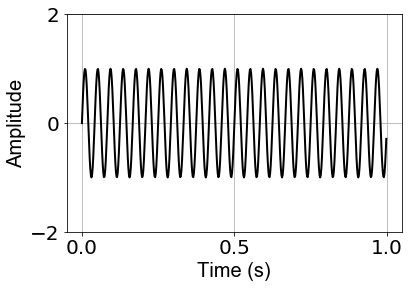

In [2]:
sr = 512                        # samp rate in Hz
f = 24                          # frequency of signal 
tmax = 1                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# make a sin wave
sw = np.sin(2*pi*f*t)

plt.plot(t, sw, 'k-', linewidth = 2)    # specify x,y data...

plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)

plt.xticks(np.arange(0,tmax+.5,.5), color='k', size=20)

plt.yticks((-2,0,2), color='k', size=20)

# grid?
plt.grid(1)

# show it
plt.show()

## do the fft and plot

Min difference between estimated freq and target freq:  0.0


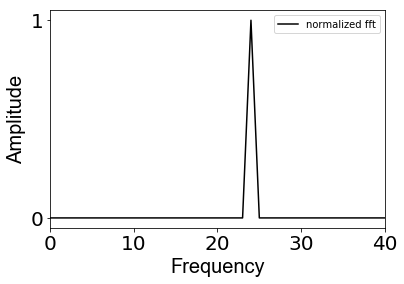

In [3]:
# normalize by the number of data points, which is dividing by number of positive frequencies or just dt
sp = (np.abs(np.fft.rfft(sw)) / len(sw)) * 2

# Sample spacing is 2nd arg, inverse of the sampling rate. Defaults to 1!
freq = np.fft.rfftfreq(sw.size, dt)        
print('Min difference between estimated freq and target freq: ', np.min(np.abs(f-freq)))

# plot amplitude (power = np.absolute(sp)**2)
plt.plot(freq, sp, 'k')            
plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.xticks(freq[0:80:10], color='k', size=20)
plt.yticks((0,1), color='k', size=20)
plt.xlim([0, 40])
plt.show()

## Now fix a length of data and vary sample rate...try changing the duration of data collection (tmax) from 2 to something weird like 2.56 or something...notice how the amp goes down with 2.56 even though you have more data!

0.015625 0.3333333333333333 97 72 24.0
Amp at sample rate: 64   0.8952744288193638 

0.0078125 0.3333333333333333 193 72 24.0
Amp at sample rate: 128   0.8269538950121585 

0.00390625 0.3333333333333333 385 72 24.0
Amp at sample rate: 256   0.8649974014777655 

0.001953125 0.3333333333333333 769 72 24.0
Amp at sample rate: 512   1.123948781356688 

0.0009765625 0.3333333333333333 1537 72 24.0
Amp at sample rate: 1024   0.8794307263221782 

0.00048828125 0.3333333333333333 3073 72 24.0
Amp at sample rate: 2048   1.0677305055920057 

0.000244140625 0.3333333333333333 6145 72 24.0
Amp at sample rate: 4096   0.9717217198902742 



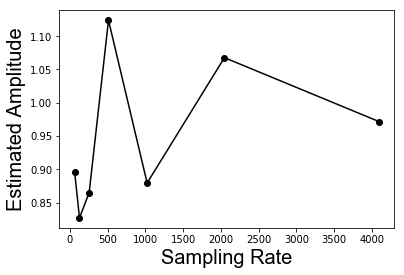

In [39]:
sr = np.array([64, 128, 256, 512, 1024, 2048, 4096])  # samp rate in Hz
f = 24                          # frequency of signal 
tmax = 3 #2.56                  # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
noise_amp = 10                  # amplitude of additive IID noise (this is actually 2*amp of noise)
num_iterations = 250            # how many times to loop to eval impact of noise as a function of 

# allocate arrray to store amp at target frequency f
amp = np.zeros(len(sr))

# loop over sample rates...
for i in range(len(sr)):
    t = np.arange(0,tmax,dt[i])        # time axis

    # make a sin wave
    sw = np.sin(2*pi*f*t) 
    
    # add some noise. 
    sw = sw + (np.random.rand((len(sw))) - .5) * noise_amp
    
    # FFT, with * dt to normalize the amplitude for number of samples in timeseries  
    # sp = np.fft.rfft(sw) * dt[i]     
    sp = (np.abs(np.fft.rfft(sw)) / len(sw)) * 2

    # get your freq axis
    freq = np.fft.rfftfreq(sw.size, dt[i])        

    # find the nearest value to your target frequency
    ind = np.argmin(np.abs(f-freq))
    print(dt[i], freq[1]-freq[0], len(freq), ind, freq[ind])

    amp[i] = sp[ind]

    print('Amp at sample rate:', sr[i], ' ', amp[i], '\n')

plt.plot(sr, amp, 'ko-')
plt.xlabel('Sampling Rate', **fig_font)
plt.ylabel('Estimated Amplitude', **fig_font)
plt.show()

In [38]:
n = 4
t = np.arange(0,tmax,dt[n])
print(len(t))
fstepSz = sr[n]/len(t)
print(sr[n], fstepSz)

3072
1024 0.3333333333333333
